In [9]:
import qiskit as q
%matplotlib inline

circuit= q.QuantumCircuit(2,2)

circuit.x(0)

circuit.cx(0,1)
circuit.measure([0,1], [0,1])
circuit.draw()

┌───┐     ┌─┐   
q_0: |0>┤ X ├──■──┤M├───
        └───┘┌─┴─┐└╥┘┌─┐
q_1: |0>─────┤ X ├─╫─┤M├
             └───┘ ║ └╥┘
 c_0: 0 ═══════════╩══╬═
                      ║ 
 c_1: 0 ══════════════╩═

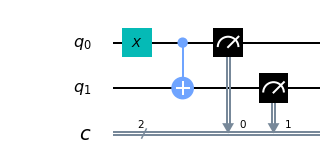

In [13]:
circuit.draw(output="mpl")

In [22]:
from qiskit import IBMQ
IBMQ.save_account('Put_Your_Token_no._here')


In [27]:
IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [40]:
provider = IBMQ.get_provider('ibm-q')

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = 'simulated'
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")   
          

ibmq_qasm_simulator has 0 queued and simulated qubits
ibmqx2 has 4 queued and 5 qubits
ibmq_16_melbourne has 7 queued and 15 qubits
ibmq_vigo has 35 queued and 5 qubits
ibmq_ourense has 0 queued and 5 qubits
ibmq_london has 3 queued and 5 qubits
ibmq_burlington has 1 queued and 5 qubits
ibmq_essex has 8 queued and 5 qubits
ibmq_armonk has 0 queued and 1 qubits
ibmq_rome has 5 queued and 5 qubits


In [39]:
from qiskit.tools.monitor import job_monitor
backend = provider.get_backend('ibmq_burlington')
job = q.execute(circuit, backend=backend,shots = 100)
job_monitor(job)

Job Status: job has successfully run


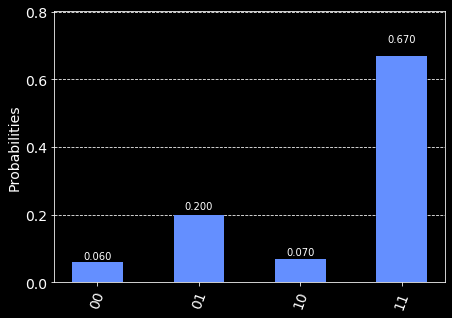

In [45]:
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use('dark_background')
result = job.result()
counts = result.get_counts(circuit)
plot_histogram([counts])